## You're here! 
Welcome to your first competition in the [ITI's AI Pro training program](https://ai.iti.gov.eg/epita/ai-engineer/)! We hope you enjoy and learn as much as we did prepairing this competition.


## Introduction

In the competition, it's required to predict the `Severity` of a car crash given info about the crash, e.g., location.

This is the getting started notebook. Things are kept simple so that it's easier to understand the steps and modify it.

Feel free to `Fork` this notebook and share it with your modifications **OR** use it to create your submissions.

### Prerequisites
You should know how to use python and a little bit of Machine Learning. You can apply the techniques you learned in the training program and submit the new solutions! 

### Checklist
You can participate in this competition the way you perefer. However, I recommend following these steps if this is your first time joining a competition on Kaggle.

* Fork this notebook and run the cells in order.
* Submit this solution.
* Make changes to the data processing step as you see fit.
* Submit the new solutions.

*You can submit up to 5 submissions per day. You can select only one of the submission you make to be considered in the final ranking.*


Don't hesitate to leave a comment or contact me if you have any question!

## Import the libraries

We'll use `pandas` to load and manipulate the data. Other libraries will be imported in the relevant sections.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import os
import numpy as np

## Exploratory Data Analysis
In this step, one should load the data and analyze it. However, I'll load the data and do minimal analysis. You are encouraged to do thorough analysis!

Let's load the data using `pandas` and have a look at the generated `DataFrame`.

In [2]:
from functools import partialmethod
pd.DataFrame.head = partialmethod(pd.DataFrame.head, n=1)

In [3]:
dataset_path = 'kaggle/input/car-crashes-severity-prediction/'

df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))

print("The shape of the dataset is {}.\n\n".format(df.shape))

df.head()

The shape of the dataset is (6407, 16).




,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
0,0,37.76215,-122.40566,False,0.044,False,False,False,False,False,False,False,True,R,2,2016-03-25 15:13:02


In [4]:
#clean duplicates
df.drop_duplicates(inplace=True)

In [5]:
#fix date and date time
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = pd.to_datetime(df['timestamp'].dt.date)
df['hour'] = df['timestamp'].dt.strftime('%H')
df['hours_Min'] = df['timestamp'].dt.strftime('%H:%M')

# this cell is used to convert T/F features into 0/1 features
df['Bump'] = df['Bump'].astype(int)
df['Crossing'] = df['Crossing'].astype(int)
df['Give_Way'] = df['Give_Way'].astype(int)
df['Junction'] = df['Junction'].astype(int)
df['No_Exit'] = df['No_Exit'].astype(int)
df['Railway'] = df['Railway'].astype(int)
df['Roundabout'] = df['Roundabout'].astype(int)
df['Stop'] = df['Stop'].astype(int)
df['Amenity'] = df['Amenity'].astype(int)
df['hour'] = df['hour'].astype(int)

# this cell is used to convert the Side column from L/R data into 0/1 data
df['Side'] = df['Side'].map(dict(L=0, R=1))

In [6]:
#show unique Value
oneValuedcols = []
for col in df.columns:    
    if len(df[col].unique()) <10:
        print(f"Col name =" ,col)
        print(df[col].unique())
        print("______")
    if len(df[col].unique()) == 1:
        oneValuedcols.append(col)
df.drop(oneValuedcols,axis=1,inplace=True)

Col name = Bump
[0]
______
Col name = Crossing
[0 1]
______
Col name = Give_Way
[0 1]
______
Col name = Junction
[0 1]
______
Col name = No_Exit
[0 1]
______
Col name = Railway
[0 1]
______
Col name = Roundabout
[0]
______
Col name = Stop
[0 1]
______
Col name = Amenity
[1 0]
______
Col name = Side
[1 0]
______
Col name = Severity
[2 3 1 4]
______


In [7]:
df['Severity'].value_counts()

2    4346
3    1855
1     129
4      77
Name: Severity, dtype: int64

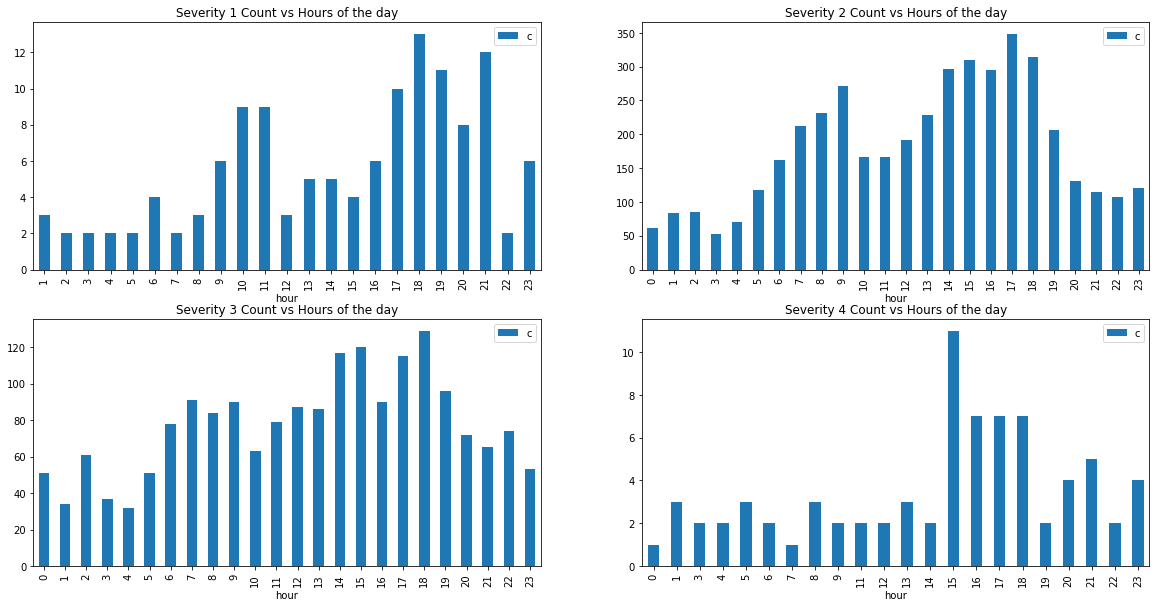

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
for (serv, ax) in zip(np.arange(1,5), axes.flatten()):
    df[[ 'hour' , "Severity" ]].loc[df['Severity'] == serv].groupby(['hour']).agg(['count']).plot(kind = "bar" ,ax =ax)    
    ax.legend(f"count")
    ax.set_title(f"Severity {str(serv)} Count vs Hours of the day")


<AxesSubplot:xlabel='hour'>

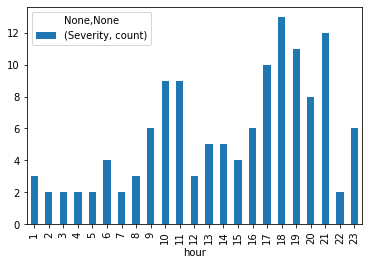

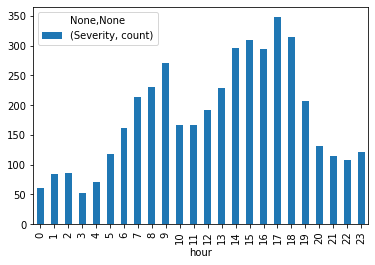

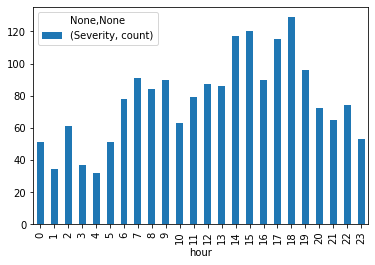

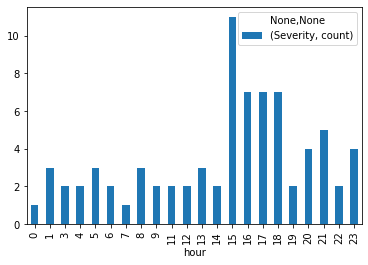

In [9]:
df[[ 'hour' , "Severity" ]].loc[df['Severity'] == 1].groupby(['hour']).agg(['count']).plot(kind = "bar")
df[[ 'hour' , "Severity" ]].loc[df['Severity'] == 2].groupby(['hour']).agg(['count']).plot(kind = "bar")
df[[ 'hour' , "Severity" ]].loc[df['Severity'] == 3].groupby(['hour']).agg(['count']).plot(kind = "bar")
df[[ 'hour' , "Severity" ]].loc[df['Severity'] == 4].groupby(['hour']).agg(['count']).plot(kind = "bar")

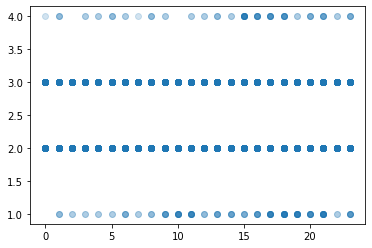

In [10]:
plt.scatter(x = df['hour'] , y = df['Severity'] , alpha = .2)

We've got 6407 examples in the dataset with 14 featues, 1 ID, and the `Severity` of the crash.

By looking at the features and a sample from the data, the features look of numerical and catogerical types. What about some descriptive statistics?

In [11]:
df.isnull().sum(axis = 0)

ID              0
Lat             0
Lng             0
Distance(mi)    0
Crossing        0
Give_Way        0
Junction        0
No_Exit         0
Railway         0
Stop            0
Amenity         0
Side            0
Severity        0
timestamp       0
date            0
hour            0
hours_Min       0
dtype: int64

### reading holidays xml

In [39]:
holidays_df = pd.read_csv(os.path.join(dataset_path, 'holidays.csv'))
print("The shape of the dataset is {}.\n\n".format(holidays_df.shape))
holidays_df.head()

The shape of the dataset is (90, 2).




,date,description
0,2012-01-02,New Year Day


In [40]:
holidays_df['date'] = pd.to_datetime(holidays_df['date'])

In [41]:
holidays_df.drop_duplicates(inplace= True)

In [42]:
holidays_df.isnull().sum(axis = 0)

date           0
description    0
dtype: int64

### reading weather csv

In [43]:
weather_df = pd.read_csv(os.path.join(dataset_path, 'weather-sfcsv.csv'))
print("The shape of the dataset is {}.\n\n".format(weather_df.shape))
weather_df.head()

The shape of the dataset is (6901, 12).




,Year,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,2020,27,7,18,Fair,64.0,0.0,64.0,70.0,20.0,10.0,No


In [44]:
weather_df.drop_duplicates(inplace=True)
weather_df['date'] = pd.to_datetime(weather_df[['Year', 'Month','Day']])
weather_df.drop(['Year' , 'Day' , 'Month'], inplace=True , axis  =1 )
weather_df = weather_df.rename(columns={'Hour': 'hour',})
weather_df.head()

,hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,date
0,18,Fair,64.0,0.0,64.0,70.0,20.0,10.0,No,2020-07-27


In [45]:
weather_df.isnull().sum(axis = 0)

hour                    0
Weather_Condition       1
Wind_Chill(F)        3609
Precipitation(in)    3327
Temperature(F)          2
Humidity(%)             2
Wind_Speed(mph)       345
Visibility(mi)          1
Selected                0
date                    0
dtype: int64

In [46]:
weather_df  = weather_df[weather_df.Weather_Condition.notnull()]

In [47]:
weather_df.isnull().sum(axis = 0)

hour                    0
Weather_Condition       0
Wind_Chill(F)        3608
Precipitation(in)    3326
Temperature(F)          1
Humidity(%)             1
Wind_Speed(mph)       344
Visibility(mi)          0
Selected                0
date                    0
dtype: int64

In [48]:
weather_df  = weather_df[weather_df['Temperature(F)'].notnull()]

In [49]:
344/(weather_df.shape[0])*100

4.986229888389622

In [50]:
weather_df.isnull().sum(axis = 0)

hour                    0
Weather_Condition       0
Wind_Chill(F)        3607
Precipitation(in)    3326
Temperature(F)          0
Humidity(%)             0
Wind_Speed(mph)       344
Visibility(mi)          0
Selected                0
date                    0
dtype: int64

In [51]:
weather_df.describe()

,hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi)
count,6899.000000,3292.000000,3573.000000,6899.000000,6899.000000,6555.000000,6899.000000
mean,12.791999,59.762515,0.006446,59.905465,68.570952,10.814355,9.441770
std,5.873393,9.338456,0.028826,7.977860,16.180126,6.406138,1.640619
min,0.000000,31.100000,0.000000,36.000000,10.000000,0.000000,0.000000
25%,8.000000,54.000000,0.000000,54.000000,59.000000,5.800000,10.000000
50%,14.000000,59.000000,0.000000,59.000000,70.000000,10.000000,10.000000
75%,17.000000,66.000000,0.000000,64.900000,80.000000,15.000000,10.000000
max,23.000000,98.000000,0.490000,98.100000,100.000000,40.300000,10.000000


,hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,date
1,17,Partly Cloudy,NaN,NaN,71.1,57.0,9.2,10.0,No,2017-09-30
2,5,Overcast,NaN,NaN,57.9,87.0,15.0,9.0,No,2017-06-27
3,9,Clear,NaN,NaN,66.9,73.0,4.6,10.0,No,2016-09-07
8,15,Mostly Cloudy,NaN,NaN,55.0,64.0,18.4,10.0,No,2019-02-14
11,20,Mostly Cloudy,NaN,NaN,60.1,78.0,17.3,10.0,No,2016-06-01
...,...,...,...,...,...,...,...,...,...,...
6892,13,Scattered Clouds,NaN,NaN,73.9,46.0,6.9,10.0,No,2016-04-18
6895,20,Clear,NaN,NaN,57.9,81.0,15.0,10.0,No,2018-10-14
6896,21,Clear,NaN,NaN,51.1,80.0,3.5,10.0,No,2018-01-23
6899,16,Mostly Cloudy,NaN,NaN,61.0,67.0,21.9,10.0,No,2016-04-22


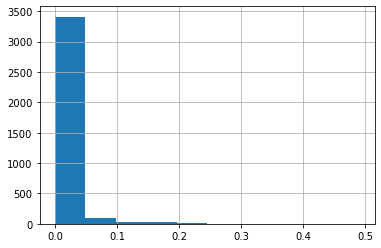

In [52]:
weather_df['Precipitation(in)'].hist();
weather_df[weather_df['Precipitation(in)'].isnull()]

In [53]:
weather_df.drop_duplicates(subset=['date','hour'],inplace=True)

,hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,date
30,5,Overcast,NaN,NaN,54.0,100.0,NaN,10.0,No,2017-03-15
38,0,Clear,NaN,NaN,55.9,97.0,NaN,10.0,No,2017-11-22
49,14,Partly Cloudy,NaN,NaN,72.0,43.0,NaN,10.0,No,2016-10-20
90,3,Scattered Clouds,NaN,NaN,48.0,89.0,NaN,8.0,No,2018-01-01
95,1,Partly Cloudy,NaN,NaN,55.0,89.0,NaN,10.0,No,2018-02-04
...,...,...,...,...,...,...,...,...,...,...
6803,0,Scattered Clouds,NaN,NaN,43.0,89.0,NaN,10.0,No,2017-01-15
6806,2,Clear,NaN,NaN,62.1,39.0,NaN,10.0,No,2017-10-17
6808,4,Shallow Fog,NaN,NaN,51.1,100.0,NaN,7.0,No,2017-11-11
6845,11,Light Rain,NaN,NaN,57.0,83.0,NaN,10.0,No,2019-01-08


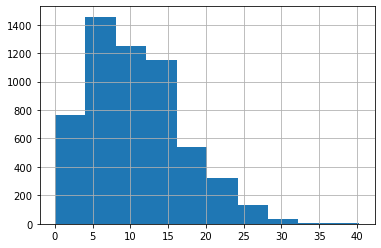

In [54]:
weather_df['Wind_Speed(mph)'].hist();
weather_df[weather_df['Wind_Speed(mph)'].isnull()]

### Merging the Data into one DataFrame

In [55]:
df.head()

,ID,Lat,Lng,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Stop,Amenity,Side,Severity,timestamp,date,hour,hours_Min
0,0,37.76215,-122.40566,0.044,0,0,0,0,0,0,1,1,2,2016-03-25 15:13:02,2016-03-25,15,15:13


In [56]:
weather_df.head()

,hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,date
0,18,Fair,64.0,0.0,64.0,70.0,20.0,10.0,No,2020-07-27


In [57]:
holidays_df.head()

,date,description
0,2012-01-02,New Year Day


In [58]:
df

,ID,Lat,Lng,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Stop,Amenity,Side,Severity,timestamp,date,hour,hours_Min
0,0,37.762150,-122.405660,0.044,0,0,0,0,0,0,1,1,2,2016-03-25 15:13:02,2016-03-25,15,15:13
1,1,37.719157,-122.448254,0.000,0,0,0,0,0,0,0,1,2,2020-05-05 19:23:00,2020-05-05,19,19:23
2,2,37.808498,-122.366852,0.000,0,0,0,0,0,1,0,1,3,2016-09-16 19:57:16,2016-09-16,19,19:57
3,3,37.785930,-122.391080,0.009,0,0,1,0,0,0,0,1,1,2020-03-29 19:48:43,2020-03-29,19,19:48
4,4,37.719141,-122.448457,0.000,0,0,0,0,0,0,0,1,2,2019-10-09 08:47:00,2019-10-09,8,08:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,6402,37.740630,-122.407930,0.368,0,0,0,0,0,0,0,1,3,2017-10-01 18:36:13,2017-10-01,18,18:36
6403,6403,37.752755,-122.402790,0.639,0,0,1,0,0,0,0,1,2,2018-10-23 07:40:27,2018-10-23,7,07:40
6404,6404,37.726304,-122.446015,0.000,0,0,1,0,0,0,0,1,2,2019-10-28 15:45:00,2019-10-28,15,15:45
6405,6405,37.808090,-122.367211,0.000,0,0,1,0,0,0,0,1,3,2019-05-04 13:45:31,2019-05-04,13,13:45


In [59]:
df.shape

(6407, 17)

In [64]:
merged = pd.merge(df, weather_df,how = "left" , on=['date','hour'])
merged.shape

(6407, 25)

In [65]:
merged[['date','hour','Weather_Condition']]

,date,hour,Weather_Condition
0,2016-03-25,15,Scattered Clouds
1,2020-05-05,19,Mostly Cloudy / Windy
2,2016-09-16,19,Clear
3,2020-03-29,19,Fair
4,2019-10-09,8,Fair
...,...,...,...
6402,2017-10-01,18,Scattered Clouds
6403,2018-10-23,7,Mostly Cloudy
6404,2019-10-28,15,Fair
6405,2019-05-04,13,Fair


In [66]:
merged.shape

(6407, 25)

In [67]:
merged.isnull().sum(axis = 0)/merged.shape[0]*100

ID                    0.000000
Lat                   0.000000
Lng                   0.000000
Distance(mi)          0.000000
Crossing              0.000000
Give_Way              0.000000
Junction              0.000000
No_Exit               0.000000
Railway               0.000000
Stop                  0.000000
Amenity               0.000000
Side                  0.000000
Severity              0.000000
timestamp             0.000000
date                  0.000000
hour                  0.000000
hours_Min             0.000000
Weather_Condition     0.031216
Wind_Chill(F)        48.899641
Precipitation(in)    44.935227
Temperature(F)        0.031216
Humidity(%)           0.031216
Wind_Speed(mph)       4.635555
Visibility(mi)        0.031216
Selected              0.031216
dtype: float64

In [68]:
merged  = merged[merged.Weather_Condition.notnull()]
merged.isnull().sum(axis = 0)/merged.shape[0]*100

ID                    0.000000
Lat                   0.000000
Lng                   0.000000
Distance(mi)          0.000000
Crossing              0.000000
Give_Way              0.000000
Junction              0.000000
No_Exit               0.000000
Railway               0.000000
Stop                  0.000000
Amenity               0.000000
Side                  0.000000
Severity              0.000000
timestamp             0.000000
date                  0.000000
hour                  0.000000
hours_Min             0.000000
Weather_Condition     0.000000
Wind_Chill(F)        48.883685
Precipitation(in)    44.918033
Temperature(F)        0.000000
Humidity(%)           0.000000
Wind_Speed(mph)       4.605777
Visibility(mi)        0.000000
Selected              0.000000
dtype: float64

In [69]:
merged = pd.merge(merged , holidays_df , how = 'left' , on = 'date')

In [70]:
merged.columns

Index(['ID', 'Lat', 'Lng', 'Distance(mi)', 'Crossing', 'Give_Way', 'Junction',
       'No_Exit', 'Railway', 'Stop', 'Amenity', 'Side', 'Severity',
       'timestamp', 'date', 'hour', 'hours_Min', 'Weather_Condition',
       'Wind_Chill(F)', 'Precipitation(in)', 'Temperature(F)', 'Humidity(%)',
       'Wind_Speed(mph)', 'Visibility(mi)', 'Selected', 'description'],
      dtype='object')

In [71]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6405 entries, 0 to 6404
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 6405 non-null   int64         
 1   Lat                6405 non-null   float64       
 2   Lng                6405 non-null   float64       
 3   Distance(mi)       6405 non-null   float64       
 4   Crossing           6405 non-null   int32         
 5   Give_Way           6405 non-null   int32         
 6   Junction           6405 non-null   int32         
 7   No_Exit            6405 non-null   int32         
 8   Railway            6405 non-null   int32         
 9   Stop               6405 non-null   int32         
 10  Amenity            6405 non-null   int32         
 11  Side               6405 non-null   int64         
 12  Severity           6405 non-null   int64         
 13  timestamp          6405 non-null   datetime64[ns]
 14  date    

In [72]:
holidays_df

,date,description
0,2012-01-02,New Year Day
1,2012-01-16,Martin Luther King Jr. Day
2,2012-02-20,Presidents Day (Washingtons Birthday)
3,2012-05-28,Memorial Day
4,2012-07-04,Independence Day
...,...,...
85,2020-09-07,Labor Day
86,2020-10-12,Columbus Day
87,2020-11-11,Veterans Day
88,2020-11-26,Thanksgiving Day


In [73]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6405 entries, 0 to 6404
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 6405 non-null   int64         
 1   Lat                6405 non-null   float64       
 2   Lng                6405 non-null   float64       
 3   Distance(mi)       6405 non-null   float64       
 4   Crossing           6405 non-null   int32         
 5   Give_Way           6405 non-null   int32         
 6   Junction           6405 non-null   int32         
 7   No_Exit            6405 non-null   int32         
 8   Railway            6405 non-null   int32         
 9   Stop               6405 non-null   int32         
 10  Amenity            6405 non-null   int32         
 11  Side               6405 non-null   int64         
 12  Severity           6405 non-null   int64         
 13  timestamp          6405 non-null   datetime64[ns]
 14  date    

In [74]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6405 entries, 0 to 6404
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 6405 non-null   int64         
 1   Lat                6405 non-null   float64       
 2   Lng                6405 non-null   float64       
 3   Distance(mi)       6405 non-null   float64       
 4   Crossing           6405 non-null   int32         
 5   Give_Way           6405 non-null   int32         
 6   Junction           6405 non-null   int32         
 7   No_Exit            6405 non-null   int32         
 8   Railway            6405 non-null   int32         
 9   Stop               6405 non-null   int32         
 10  Amenity            6405 non-null   int32         
 11  Side               6405 non-null   int64         
 12  Severity           6405 non-null   int64         
 13  timestamp          6405 non-null   datetime64[ns]
 14  date    

In [75]:
merged['description'] = merged['description'].fillna(0)
merged['description'].unique()

array([0, 'Christmas Day', 'Presidents Day (Washingtons Birthday)',
       'New Year Day', 'Martin Luther King Jr. Day', 'Memorial Day',
       'Veterans Day', 'Labor Day', 'Columbus Day', 'Independence Day',
       'Thanksgiving Day'], dtype=object)

In [76]:
merged.loc[merged['description']!= 0, 'description'] = 1

In [77]:
merged['description'].unique()

array([0, 1], dtype=object)

In [78]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6405 entries, 0 to 6404
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 6405 non-null   int64         
 1   Lat                6405 non-null   float64       
 2   Lng                6405 non-null   float64       
 3   Distance(mi)       6405 non-null   float64       
 4   Crossing           6405 non-null   int32         
 5   Give_Way           6405 non-null   int32         
 6   Junction           6405 non-null   int32         
 7   No_Exit            6405 non-null   int32         
 8   Railway            6405 non-null   int32         
 9   Stop               6405 non-null   int32         
 10  Amenity            6405 non-null   int32         
 11  Side               6405 non-null   int64         
 12  Severity           6405 non-null   int64         
 13  timestamp          6405 non-null   datetime64[ns]
 14  date    

In [79]:
merged.isnull().sum(axis = 0)/merged.shape[0]*100

ID                    0.000000
Lat                   0.000000
Lng                   0.000000
Distance(mi)          0.000000
Crossing              0.000000
Give_Way              0.000000
Junction              0.000000
No_Exit               0.000000
Railway               0.000000
Stop                  0.000000
Amenity               0.000000
Side                  0.000000
Severity              0.000000
timestamp             0.000000
date                  0.000000
hour                  0.000000
hours_Min             0.000000
Weather_Condition     0.000000
Wind_Chill(F)        48.883685
Precipitation(in)    44.918033
Temperature(F)        0.000000
Humidity(%)           0.000000
Wind_Speed(mph)       4.605777
Visibility(mi)        0.000000
Selected              0.000000
description           0.000000
dtype: float64

### Data Cleaning

The output shows desciptive statistics for the numerical features, `Lat`, `Lng`, `Distance(mi)`, and `Severity`. I'll use the numerical features to demonstrate how to train the model and make submissions. **However you shouldn't use the numerical features only to make the final submission if you want to make it to the top of the leaderboard.**

In [80]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6405 entries, 0 to 6404
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 6405 non-null   int64         
 1   Lat                6405 non-null   float64       
 2   Lng                6405 non-null   float64       
 3   Distance(mi)       6405 non-null   float64       
 4   Crossing           6405 non-null   int32         
 5   Give_Way           6405 non-null   int32         
 6   Junction           6405 non-null   int32         
 7   No_Exit            6405 non-null   int32         
 8   Railway            6405 non-null   int32         
 9   Stop               6405 non-null   int32         
 10  Amenity            6405 non-null   int32         
 11  Side               6405 non-null   int64         
 12  Severity           6405 non-null   int64         
 13  timestamp          6405 non-null   datetime64[ns]
 14  date    

In [81]:
def norm(df_,col):
    mincol = df_[col].min()
    maxcol = df_[col].max()
    newcolname = f'{col}_norm'
    df_[newcolname] = (df_[col] - mincol)/(maxcol - mincol)

In [82]:
norm(merged, 'Distance(mi)')

## Data Splitting

Now it's time to split the dataset for the training step. Typically the dataset is split into 3 subsets, namely, the training, validation and test sets. In our case, the test set is already predefined. So we'll split the "training" set into training and validation sets with 0.8:0.2 ratio. 

*Note: a good way to generate reproducible results is to set the seed to the algorithms that depends on randomization. This is done with the argument `random_state` in the following command* 

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder


In [84]:
merged.columns

Index(['ID', 'Lat', 'Lng', 'Distance(mi)', 'Crossing', 'Give_Way', 'Junction',
       'No_Exit', 'Railway', 'Stop', 'Amenity', 'Side', 'Severity',
       'timestamp', 'date', 'hour', 'hours_Min', 'Weather_Condition',
       'Wind_Chill(F)', 'Precipitation(in)', 'Temperature(F)', 'Humidity(%)',
       'Wind_Speed(mph)', 'Visibility(mi)', 'Selected', 'description',
       'Distance(mi)_norm'],
      dtype='object')

In [85]:
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(merged[["Weather_Condition"]])
Weather_Condition_df = pd.DataFrame(oe_results.toarray(), columns=oe_style.get_feature_names())
merged = pd.concat([merged,Weather_Condition_df], axis=1).drop(['Weather_Condition'], axis=1)
merged

,ID,Lat,Lng,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Stop,...,x0_Overcast,x0_Partly Cloudy,x0_Partly Cloudy / Windy,x0_Patches of Fog,x0_Rain,x0_Rain / Windy,x0_Scattered Clouds,x0_Shallow Fog,x0_Smoke,x0_Squalls
0,0,37.762150,-122.405660,0.044,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,37.719157,-122.448254,0.000,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,37.808498,-122.366852,0.000,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,37.785930,-122.391080,0.009,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,37.719141,-122.448457,0.000,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,6402,37.740630,-122.407930,0.368,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6401,6403,37.752755,-122.402790,0.639,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6402,6404,37.726304,-122.446015,0.000,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6403,6405,37.808090,-122.367211,0.000,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
merged.columns

Index(['ID', 'Lat', 'Lng', 'Distance(mi)', 'Crossing', 'Give_Way', 'Junction',
       'No_Exit', 'Railway', 'Stop', 'Amenity', 'Side', 'Severity',
       'timestamp', 'date', 'hour', 'hours_Min', 'Wind_Chill(F)',
       'Precipitation(in)', 'Temperature(F)', 'Humidity(%)', 'Wind_Speed(mph)',
       'Visibility(mi)', 'Selected', 'description', 'Distance(mi)_norm',
       'x0_Clear', 'x0_Cloudy', 'x0_Cloudy / Windy', 'x0_Fair',
       'x0_Fair / Windy', 'x0_Fog', 'x0_Fog / Windy', 'x0_Haze',
       'x0_Heavy Rain', 'x0_Light Drizzle', 'x0_Light Rain',
       'x0_Light Rain / Windy', 'x0_Light Thunderstorms and Rain', 'x0_Mist',
       'x0_Mostly Cloudy', 'x0_Mostly Cloudy / Windy', 'x0_Overcast',
       'x0_Partly Cloudy', 'x0_Partly Cloudy / Windy', 'x0_Patches of Fog',
       'x0_Rain', 'x0_Rain / Windy', 'x0_Scattered Clouds', 'x0_Shallow Fog',
       'x0_Smoke', 'x0_Squalls'],
      dtype='object')

In [87]:
norm(merged ,'Wind_Speed(mph)' )
norm(merged ,'Visibility(mi)' )

In [88]:
merged.columns

Index(['ID', 'Lat', 'Lng', 'Distance(mi)', 'Crossing', 'Give_Way', 'Junction',
       'No_Exit', 'Railway', 'Stop', 'Amenity', 'Side', 'Severity',
       'timestamp', 'date', 'hour', 'hours_Min', 'Wind_Chill(F)',
       'Precipitation(in)', 'Temperature(F)', 'Humidity(%)', 'Wind_Speed(mph)',
       'Visibility(mi)', 'Selected', 'description', 'Distance(mi)_norm',
       'x0_Clear', 'x0_Cloudy', 'x0_Cloudy / Windy', 'x0_Fair',
       'x0_Fair / Windy', 'x0_Fog', 'x0_Fog / Windy', 'x0_Haze',
       'x0_Heavy Rain', 'x0_Light Drizzle', 'x0_Light Rain',
       'x0_Light Rain / Windy', 'x0_Light Thunderstorms and Rain', 'x0_Mist',
       'x0_Mostly Cloudy', 'x0_Mostly Cloudy / Windy', 'x0_Overcast',
       'x0_Partly Cloudy', 'x0_Partly Cloudy / Windy', 'x0_Patches of Fog',
       'x0_Rain', 'x0_Rain / Windy', 'x0_Scattered Clouds', 'x0_Shallow Fog',
       'x0_Smoke', 'x0_Squalls', 'Wind_Speed(mph)_norm',
       'Visibility(mi)_norm'],
      dtype='object')

As pointed out eariler, I'll use the numerical features to train the classifier. **However, you shouldn't use the numerical features only to make the final submission if you want to make it to the top of the leaderboard.** 

## Model Training

Let's train a model with the data! We'll train a Random Forest Classifier to demonstrate the process of making submissions. 

In [89]:
# This cell is used to select the numerical features. IT SHOULD BE REMOVED AS YOU DO YOUR WORK.
to_take = ['Lat', 'Lng', 'Distance(mi)_norm','Junction'
           ,'Stop','Amenity','Side','Wind_Speed(mph)_norm','Visibility(mi)_norm']

train_df, val_df = train_test_split(merged[merged['Wind_Speed(mph)'].notnull()], test_size=0.2, random_state=42) # Try adding `stratify` here

X_train = train_df.drop(columns=['ID', 'Severity'])
y_train = train_df['Severity']

X_val = val_df.drop(columns=['ID', 'Severity'])
y_val = val_df['Severity']
# This cell is used to select the numerical features. IT SHOULD BE REMOVED AS YOU DO YOUR WORK.
X_train = X_train[to_take]
X_val = X_val[to_take]

classifier = RandomForestClassifier(max_depth=2, random_state=0)

# Train the classifier
classifier = classifier.fit(X_train, y_train)
print("The accuracy of the classifier on the validation set is ", (classifier.score(X_val, y_val)))

The accuracy of the classifier on the validation set is  0.7430441898527005


Now let's test our classifier on the validation dataset and see the accuracy.

Well. That's a good start, right? A classifier that predicts all examples' `Severity` as 2 will get around 0.63. You should get better score as you add more features and do better data preprocessing.

## Submission File Generation

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 

First, we'll load the data.

In [90]:
test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
test_df.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp
0,6407,37.78606,-122.3909,False,0.039,False,False,True,False,False,False,False,False,R,2016-04-04 19:20:31


In [91]:
test_df.drop_duplicates(inplace=True)

#fix date and date time
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])
test_df['date'] = pd.to_datetime(test_df['timestamp'].dt.date)
test_df['hour'] = test_df['timestamp'].dt.strftime('%H')
test_df['hours_Min'] = test_df['timestamp'].dt.strftime('%H:%M')

# this cell is used to convert T/F features into 0/1 features
test_df['Bump'] = test_df['Bump'].astype(int)
test_df['Crossing'] = test_df['Crossing'].astype(int)
test_df['Give_Way'] = test_df['Give_Way'].astype(int)
test_df['Junction'] = test_df['Junction'].astype(int)
test_df['No_Exit'] = test_df['No_Exit'].astype(int)
test_df['Railway'] = test_df['Railway'].astype(int)
test_df['Roundabout'] = test_df['Roundabout'].astype(int)
test_df['Stop'] = test_df['Stop'].astype(int)
test_df['Amenity'] = test_df['Amenity'].astype(int)
test_df['hour'] = test_df['hour'].astype(int)



# this cell is used to convert the Side column from L/R data into 0/1 data
test_df['Side'] = test_df['Side'].map(dict(L=0, R=1))

test_df.drop(oneValuedcols,axis=1,inplace=True)
test_df

,ID,Lat,Lng,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Stop,Amenity,Side,timestamp,date,hour,hours_Min
0,6407,37.786060,-122.390900,0.039,0,0,1,0,0,0,0,1,2016-04-04 19:20:31,2016-04-04,19,19:20
1,6408,37.769609,-122.415057,0.202,0,0,0,0,0,0,0,1,2020-10-28 11:51:00,2020-10-28,11,11:51
2,6409,37.807495,-122.476021,0.000,0,0,0,0,0,0,0,1,2019-09-09 07:36:45,2019-09-09,7,07:36
3,6410,37.761818,-122.405869,0.000,0,0,1,0,0,0,0,1,2019-08-06 15:46:25,2019-08-06,15,15:46
4,6411,37.732350,-122.414100,0.670,0,0,0,0,0,0,0,1,2018-10-17 09:54:58,2018-10-17,9,09:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,8003,37.812973,-122.362335,4.460,0,0,0,0,0,0,0,1,2020-06-26 22:32:22,2020-06-26,22,22:32
1597,8004,37.761818,-122.405861,0.010,0,0,1,0,0,0,0,1,2016-12-03 07:16:30,2016-12-03,7,07:16
1598,8005,37.732260,-122.431970,0.431,0,0,1,0,0,0,0,1,2017-02-20 06:32:44,2017-02-20,6,06:32
1599,8006,37.786782,-122.390126,0.000,1,0,0,0,0,0,0,1,2019-10-31 20:35:00,2019-10-31,20,20:35


In [92]:
test_df = pd.merge(test_df,weather_df,how = "left" , left_on=['date','hour'],right_on=['date','hour'] )
test_df = test_df.merge(holidays_df , how = 'left' , on = 'date')
test_df


,ID,Lat,Lng,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Stop,...,hours_Min,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,description
0,6407,37.786060,-122.390900,0.039,0,0,1,0,0,0,...,19:20,Partly Cloudy,NaN,NaN,63.0,60.0,10.4,10.0,No,NaN
1,6408,37.769609,-122.415057,0.202,0,0,0,0,0,0,...,11:51,Fair,65.0,0.0,65.0,56.0,5.0,9.0,No,NaN
2,6409,37.807495,-122.476021,0.000,0,0,0,0,0,0,...,07:36,Mostly Cloudy,58.0,0.0,58.0,90.0,18.0,10.0,No,NaN
3,6410,37.761818,-122.405869,0.000,0,0,1,0,0,0,...,15:46,Fair,72.0,0.0,72.0,59.0,17.0,10.0,No,NaN
4,6411,37.732350,-122.414100,0.670,0,0,0,0,0,0,...,09:54,Scattered Clouds,NaN,NaN,57.0,77.0,5.8,10.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,8003,37.812973,-122.362335,4.460,0,0,0,0,0,0,...,22:32,Cloudy,60.0,0.0,60.0,86.0,13.0,10.0,No,NaN
1597,8004,37.761818,-122.405861,0.010,0,0,1,0,0,0,...,07:16,Partly Cloudy,NaN,NaN,46.0,66.0,NaN,10.0,No,NaN
1598,8005,37.732260,-122.431970,0.431,0,0,1,0,0,0,...,06:32,Overcast,NaN,0.0,57.9,84.0,9.2,10.0,No,Presidents Day (Washingtons Birthday)
1599,8006,37.786782,-122.390126,0.000,1,0,0,0,0,0,...,20:35,Fair,55.0,0.0,55.0,40.0,0.0,10.0,No,NaN


In [93]:
test_df  = test_df[test_df.Weather_Condition.notnull()]
test_df['description'] = test_df['description'].fillna(0)
test_df.loc[test_df['description']!= 0, 'description'] = 1
norm(test_df, 'Distance(mi)')
norm(test_df ,'Wind_Speed(mph)' )
norm(test_df ,'Visibility(mi)' )

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(test_df[["Weather_Condition"]])
Weather_Condition_df = pd.DataFrame(oe_results.toarray(), columns=oe_style.get_feature_names())
test_df = pd.concat([test_df,Weather_Condition_df], axis=1).drop(['Weather_Condition'], axis=1)

In [94]:
test_df.columns

Index(['ID', 'Lat', 'Lng', 'Distance(mi)', 'Crossing', 'Give_Way', 'Junction',
       'No_Exit', 'Railway', 'Stop', 'Amenity', 'Side', 'timestamp', 'date',
       'hour', 'hours_Min', 'Wind_Chill(F)', 'Precipitation(in)',
       'Temperature(F)', 'Humidity(%)', 'Wind_Speed(mph)', 'Visibility(mi)',
       'Selected', 'description', 'Distance(mi)_norm', 'Wind_Speed(mph)_norm',
       'Visibility(mi)_norm', 'x0_Clear', 'x0_Cloudy', 'x0_Cloudy / Windy',
       'x0_Fair', 'x0_Fair / Windy', 'x0_Fog', 'x0_Haze', 'x0_Heavy Rain',
       'x0_Light Drizzle', 'x0_Light Rain', 'x0_Light Rain / Windy',
       'x0_Mostly Cloudy', 'x0_Mostly Cloudy / Windy', 'x0_Overcast',
       'x0_Partly Cloudy', 'x0_Partly Cloudy / Windy', 'x0_Rain',
       'x0_Rain / Windy', 'x0_Scattered Clouds', 'x0_Shallow Fog', 'x0_Smoke'],
      dtype='object')

Note that the test set has the same features and doesn't have the `Severity` column.
At this stage one must **NOT** forget to apply the same processing done on the training set on the features of the test set.

Now we'll add `Severity` column to the test `DataFrame` and add the values of the predicted class to it.

**I'll select the numerical features here as I did in the training set. DO NOT forget to change this step as you change the preprocessing of the training data.**

In [95]:
test_df = test_df[test_df['Wind_Speed(mph)'].notnull()]

In [96]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1528 entries, 0 to 1600
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        1528 non-null   int64         
 1   Lat                       1528 non-null   float64       
 2   Lng                       1528 non-null   float64       
 3   Distance(mi)              1528 non-null   float64       
 4   Crossing                  1528 non-null   int32         
 5   Give_Way                  1528 non-null   int32         
 6   Junction                  1528 non-null   int32         
 7   No_Exit                   1528 non-null   int32         
 8   Railway                   1528 non-null   int32         
 9   Stop                      1528 non-null   int32         
 10  Amenity                   1528 non-null   int32         
 11  Side                      1528 non-null   int64         
 12  timestamp           

In [97]:
to_take

['Lat',
 'Lng',
 'Distance(mi)_norm',
 'Junction',
 'Stop',
 'Amenity',
 'Side',
 'Wind_Speed(mph)_norm',
 'Visibility(mi)_norm']

In [98]:
X_test = test_df.drop(columns=['ID'])

# You should update/remove the next line once you change the features used for training
X_test = X_test[to_take]
y_test_predicted = classifier.predict(X_test)

test_df['Severity'] = y_test_predicted

test_df.head()

,ID,Lat,Lng,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Stop,...,x0_Mostly Cloudy / Windy,x0_Overcast,x0_Partly Cloudy,x0_Partly Cloudy / Windy,x0_Rain,x0_Rain / Windy,x0_Scattered Clouds,x0_Shallow Fog,x0_Smoke,Severity
0,6407,37.78606,-122.3909,0.039,0,0,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2


Now we're ready to generate the submission file. The submission file needs the columns `ID` and `Severity` only.

In [99]:
test_df[['ID', 'Severity']].to_csv('kaggle/working/submission.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'kaggle/working/submission.csv'

The remaining steps is to submit the generated file and are as follows. 

1. Press `Save Version` on the upper right corner of this notebook.
2. Write a `Version Name` of your choice and choose `Save & Run All (Commit)` then click `Save`.
3. Wait for the saved notebook to finish running the go to the saved notebook.
4. Scroll down until you see the output files then select the `submission.csv` file and click `Submit`.

Now your submission will be evaluated and your score will be updated on the leaderboard! CONGRATULATIONS!!

## Conclusion

In this notebook, we have demonstrated the essential steps that one should do in order to get "slightly" familiar with the data and the submission process. We chose not to go into details in each step to keep the welcoming notebook simple and make a room for improvement.

You're encourged to `Fork` the notebook, edit it, add your insights and use it to create your submission.